# Support Vector Machines - Example on Iris Datatset

## Importing and loading data

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# storing the complete dataset in iris
iris = datasets.load_iris()

# We only take the first two features(sepal_length, sepal width)
X = iris.data[:, :2]

# Target variable 'Species'
y = iris.target

print(X.shape, y.shape)

(150, 2) (150,)


## Visualising classification regions

### Prepare a mesh grid

The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

In [17]:
# create a mesh-grid to show the classification regions 

# defining limit for the x axis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# defining limit for y axis
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 0.01 step size with respect to x limit
h = (x_max / x_min)/100

# defining the meshgrid with above parameters
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(xx[:10])
print('----')
print(yy[:10], end = '')

[[3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 ...
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]]
----
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.0269697  1.0269697  1.0269697  ... 1.0269697  1.0269697  1.0269697 ]
 [1.05393939 1.05393939 1.05393939 ... 1.05393939 1.05393939 1.05393939]
 ...
 [1.18878788 1.18878788 1.18878788 ... 1.18878788 1.18878788 1.18878788]
 [1.21575758 1.21575758 1.21575758 ... 1.21575758 1.21575758 1.21575758]
 [1.24272727 1.24272727 1.24272727 ... 1.24272727 1.24272727 1.24272727]]

### Plotting the regions

#### Default SVC model

In [5]:
# Fit the model
svc = SVC()
svc.fit(X, y)

SVC()

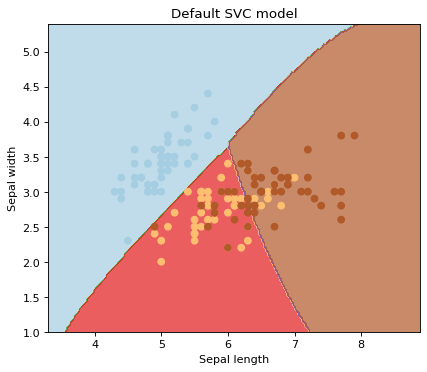

In [8]:
plt.figure(figsize = (6,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.7)
plt.scatter(X[:, 0], X[:, 1] , c = y, cmap = plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default SVC model')

plt.show()

#### Linear SVM

In [9]:
# Fit the model
svc = SVC(kernel = 'linear')
svc.fit(X, y)

SVC(kernel='linear')

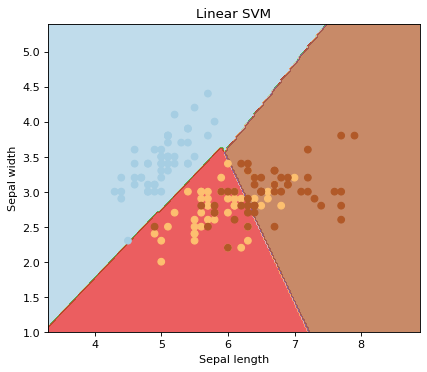

In [11]:
plt.figure(figsize = (6,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1] , c = y, cmap = plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVM')

plt.show()

We can clearly see that Linear SVM creates the classification curve which is linear or a straight line. Therefore, misclassification isunavoidable and prominent.

#### Polynomial SVM

In [18]:
# Fit the model
svc = SVC(kernel = 'poly')
svc.fit(X, y)

SVC(kernel='poly')

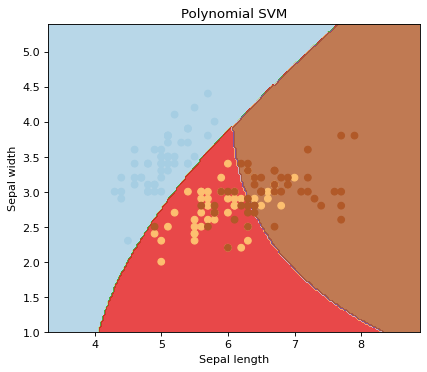

In [19]:
plt.figure(figsize = (6,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1] , c = y, cmap = plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Polynomial SVM')
plt.show()

We can see that the polynomial kernel is able capture the nonlinear relation, the most prominent paramter with this kernel is the degree of polynomial features.

#### Polynimial SVM with different degrees

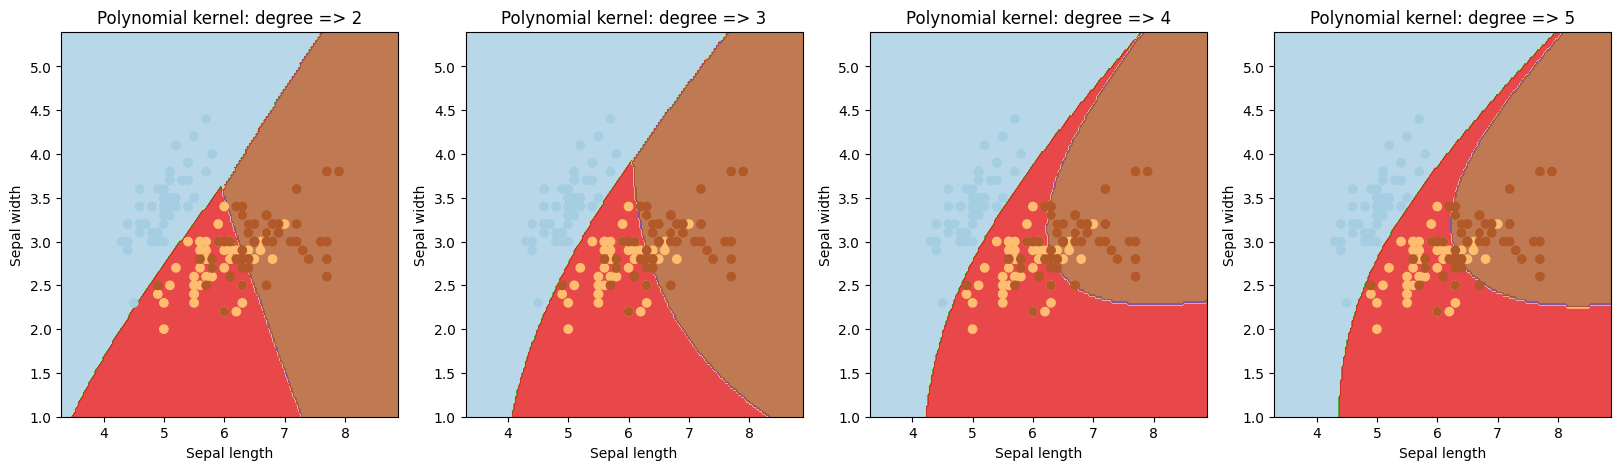

In [20]:
plt.figure(figsize = (20,5))

for i in range(2,6):
    svc = SVC(kernel = 'poly', degree = i)
    svc.fit(X, y)
    
    plt.subplot(1, 4, i-1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('Polynomial kernel: degree => ' + str(i))

plt.show()

We can clearly see that as the degree of the polynomial increases, the separating line starts to exhibit a complex nature.
You can also notice that it took more than usual time to run the model with degree 5 for a dataset so small.
Which validates our claim that polynomial kernel requires high computational power.

#### SVM with rbf / gaussian kernel

In [21]:
# Fit the model
svc = SVC(kernel = 'rbf')
svc.fit(X, y)

SVC()

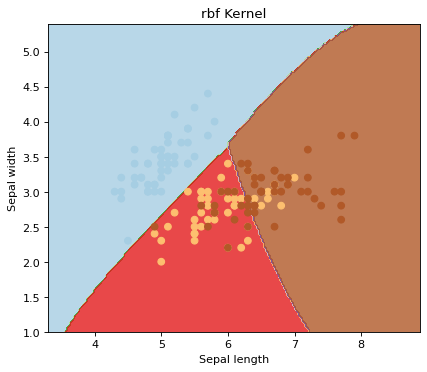

In [22]:
plt.figure(figsize = (6,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('rbf Kernel')

plt.show()

The parameters that governs the performance of the 'rbf' are the parameters:
- **C** which is the regularisation parameter
- **GAMMA** which is the distance of margin of the classifier.

#### rbf / gaussian kernel with respect to gamma (C: constant)

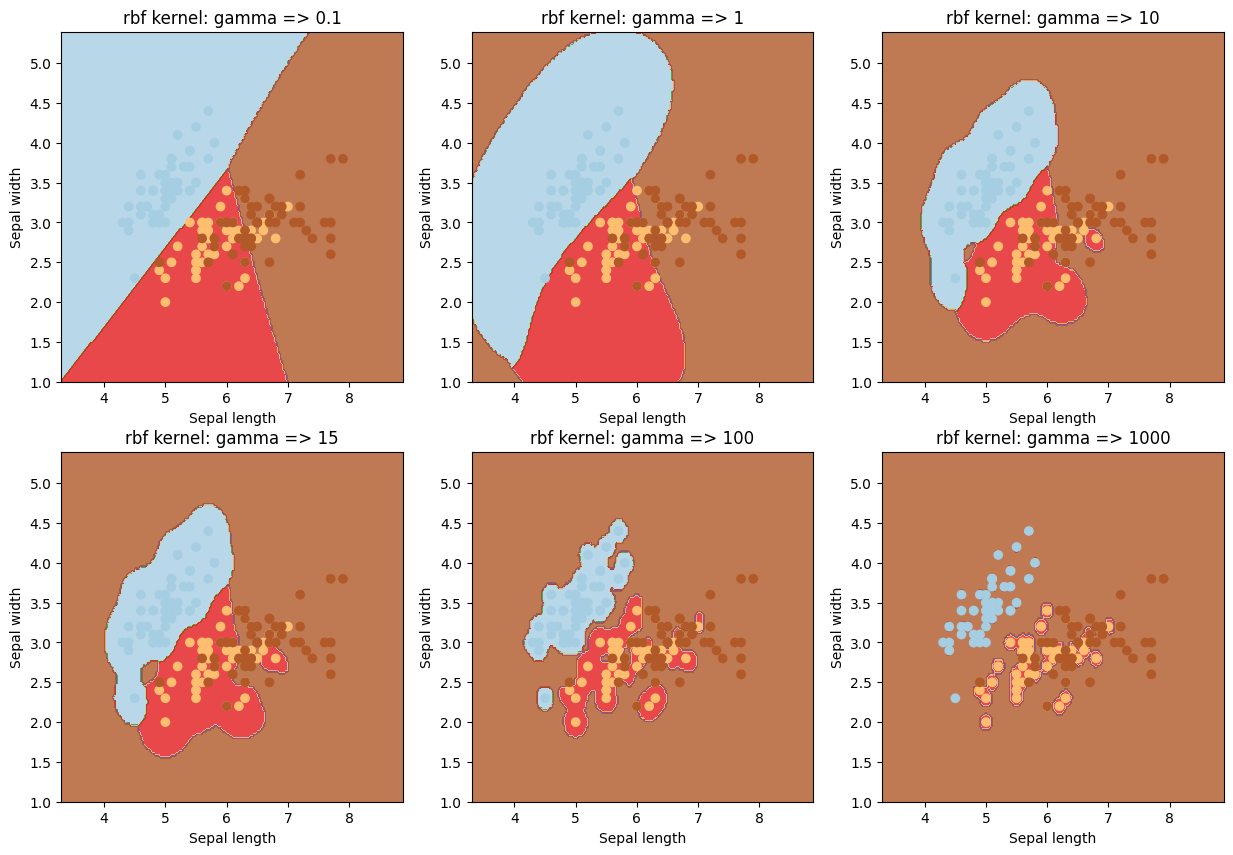

In [23]:
plt.figure(figsize = (15,10))
gamma = [0.1,1,10,15,100,1000]

for i in range(len(gamma)):
  svc = SVC(kernel = 'rbf', gamma = gamma[i])
  svc.fit(X, y)

  plt.subplot(2,3,i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
    
  plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap = plt.cm.Paired)
    
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: gamma => '+ str(gamma[i]))

plt.show()

We can clearly see that taking a very small value of Gamma in SVC is similar to using the linear SVC, but as we increase the Value of the gamma , the classification process improves but starts to over fit if we take a very hight value of the GAMMA.

The important thing to note is the nature of overfitting when Gamma is 1000, each and everypoint is correctly classified and is almost perfectly isolated in circular classification curves.

#### Change with respect to C ( gamma = constant)

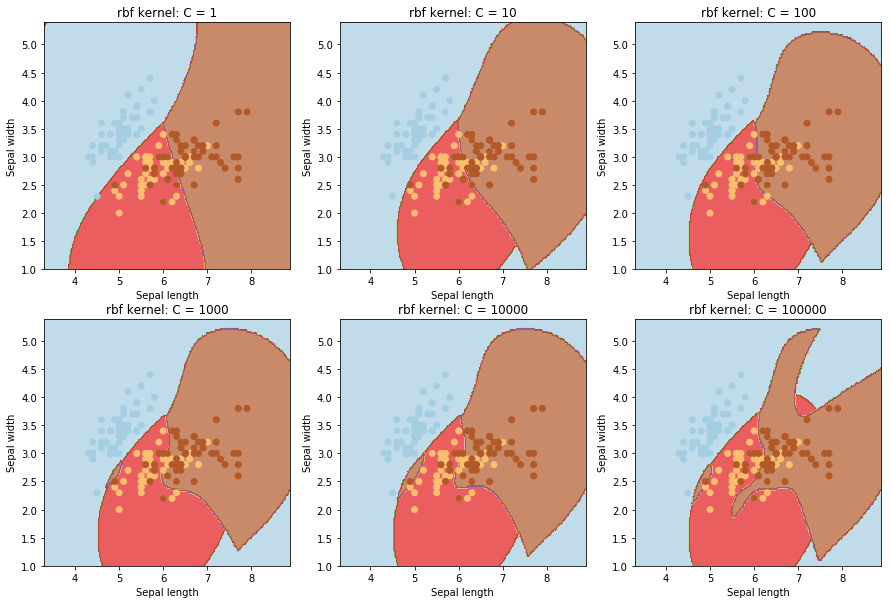

In [15]:
plt.figure(figsize = (15,10))

c =[1,10,100,1000,10000,100000]
for i in range(len(c)):
  svc = SVC(kernel = 'rbf', C = c[i], gamma=0.5)
  svc.fit(X, y)

  plt.subplot(2,3,i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

  
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: C = '+ str(c[i]))

plt.show()